In [1]:
import os
from Bio import SeqIO
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from pandas import DataFrame
from sklearn.cluster import KMeans
import math

In [2]:
notebook_path = os.path.abspath("genomeClustering.ipynb")
path = os.path.join(os.path.dirname(notebook_path), "data/J29B_expected.fasta")
pathFASTQ= os.path.join(os.path.dirname(notebook_path), "data/fastq/J29_B_CE_IonXpress_005.fastq")

expected = list(SeqIO.parse(path, "fasta"))
    
from Bio import Align
aligner = Align.PairwiseAligner()
aligner.mode = 'local'

aligner.match_score = 1
aligner.mismatch_score = 0
aligner.open_gap_score = -1
aligner.extend_gap_score = 0
aligner.target_end_gap_score = 0
aligner.query_end_gap_score = 0

#print(aligner.query_end_gap_score)


expAlign1 = aligner.align(expected[0].seq,expected[1].seq)
print("JELEN 5-6 = ",249-expAlign1[0].score, "Number of alignments: %d" % len(expAlign1))
expAlign2 = aligner.align(expected[1].seq,expected[2].seq)
print("JELEN 6-7 = ",249-expAlign2[0].score, "Number of alignments: %d" % len(expAlign2))
expAlign3 = aligner.align(expected[0].seq,expected[2].seq)
print("JELEN 5-7 = ",249-expAlign3[0].score, "Number of alignments: %d" % len(expAlign3))

data = list(SeqIO.parse(pathFASTQ, "fastq"))



JELEN 5-6 =  16.0 Number of alignments: 1
JELEN 6-7 =  26.0 Number of alignments: 1
JELEN 5-7 =  30.0 Number of alignments: 1


In [3]:
sizedReadings = []

for dataDistances in data:
    if(len(dataDistances.seq)==296):
        sizedReadings.append(dataDistances.seq[27:-20])
df = DataFrame(np.zeros((len(sizedReadings)+3, len(sizedReadings))))

for i in range(0, len(sizedReadings)):
    for j in range(i, len(sizedReadings)):
        distance = aligner.align(sizedReadings[i], sizedReadings[j]).score
        df[i][j] = distance
        df[j][i] = distance
print(df)

       0      1      2      3      4      5      6      7      8      9    \
0    249.0  245.0  245.0  230.0  229.0  246.0  244.0  225.0  230.0  230.0   
1    245.0  249.0  246.0  232.0  231.0  248.0  243.0  227.0  232.0  232.0   
2    245.0  246.0  249.0  231.0  230.0  247.0  243.0  226.0  231.0  231.0   
3    230.0  232.0  231.0  249.0  248.0  233.0  228.0  244.0  249.0  249.0   
4    229.0  231.0  230.0  248.0  249.0  232.0  227.0  244.0  248.0  248.0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
836  230.0  232.0  231.0  249.0  248.0  233.0  228.0  244.0  249.0  249.0   
837  229.0  230.0  233.0  247.0  246.0  231.0  227.0  242.0  247.0  247.0   
838    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
839    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
840    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

     ...    828    829    830    831    832    833    834    835    836    

In [4]:
for i in range(0, len(sizedReadings)):
    df[i][len(sizedReadings)] = aligner.align(expected[0].seq, sizedReadings[i]).score
    df[i][len(sizedReadings)+1] = aligner.align(expected[1].seq, sizedReadings[i]).score
    df[i][len(sizedReadings)+2] = aligner.align(expected[2].seq, sizedReadings[i]).score

print(df)
    
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])


       0      1      2      3      4      5      6      7      8      9    \
0    249.0  245.0  245.0  230.0  229.0  246.0  244.0  225.0  230.0  230.0   
1    245.0  249.0  246.0  232.0  231.0  248.0  243.0  227.0  232.0  232.0   
2    245.0  246.0  249.0  231.0  230.0  247.0  243.0  226.0  231.0  231.0   
3    230.0  232.0  231.0  249.0  248.0  233.0  228.0  244.0  249.0  249.0   
4    229.0  231.0  230.0  248.0  249.0  232.0  227.0  244.0  248.0  248.0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
836  230.0  232.0  231.0  249.0  248.0  233.0  228.0  244.0  249.0  249.0   
837  229.0  230.0  233.0  247.0  246.0  231.0  227.0  242.0  247.0  247.0   
838  230.0  232.0  231.0  249.0  248.0  233.0  228.0  244.0  249.0  249.0   
839  246.0  248.0  247.0  233.0  232.0  249.0  244.0  228.0  233.0  233.0   
840  220.0  222.0  221.0  219.0  218.0  223.0  218.0  214.0  219.0  219.0   

     ...    828    829    830    831    832    833    834    835    836    

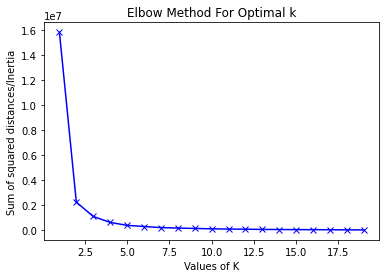

In [5]:
K = range(1,20)
Sum_of_squared_distance = []
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(principalDf)
 Sum_of_squared_distance.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distance,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

            PC1        PC2
838  -46.401512  -1.413130
839  403.760177 -75.635783
840  791.401791  98.734190
-46.40151170402187 -1.4131302435578645
403.76017655084723 -75.63578273020467
791.4017912839363 98.73419047940068


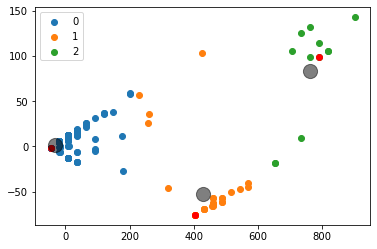

In [8]:
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(principalDf)
#print(label)

#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(principalComponents[label == i , 0] , principalComponents[label == i , 1] , label = i)


df2 = pd.DataFrame(data=principalDf.tail(3))
print(df2)
for i in range(0,len(df2)):
    print(df2.iloc[i]['PC1'], df2.iloc[i]['PC2'])
    plt.scatter(df2.iloc[i]['PC1'], df2.iloc[i]['PC2'], color='red')

    
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

plt.legend()
plt.show()

In [19]:
dataframe_min = principalDf.min()
dataframe_max = principalDf.max()

data_dis_X = math.dist([dataframe_min['PC1']], [dataframe_max['PC1']])
data_dis_Y = math.dist([dataframe_min['PC2']], [dataframe_max['PC2']])

dis_sum = 0
for i in range(0, 3):
    for j in range(0, 3):
        if(label[len(principalDf)-1-j] == i):
            dis_X = math.dist([principalDf.iloc[len(principalDf)-1-j]['PC1']], [kmeans.cluster_centers_[i][0]])
            dis_Y = math.dist([principalDf.iloc[len(principalDf)-1-j]['PC2']], [kmeans.cluster_centers_[i][1]])
            dis_sum += (dis_X/data_dis_X + dis_Y/data_dis_Y)/6

print('Točnost modela je: ', 1-dis_sum)

Točnost modela je:  0.9557809157852434


## Izračunavanje za J30 

In [12]:
notebook_path = os.path.abspath("genomeClustering.ipynb")
path = os.path.join(os.path.dirname(notebook_path), "data/J30B_expected.fasta")
pathFASTQ= os.path.join(os.path.dirname(notebook_path), "data/fastq/J30_B_CE_IonXpress_006.fastq")

expected = list(SeqIO.parse(path, "fasta"))
    
from Bio import Align
aligner = Align.PairwiseAligner()
aligner.mode = 'local'

aligner.match_score = 1
aligner.mismatch_score = 0
aligner.open_gap_score = -1
aligner.extend_gap_score = 0
aligner.target_end_gap_score = 0
aligner.query_end_gap_score = 0

#print(aligner.query_end_gap_score)


expAlign1 = aligner.align(expected[0].seq,expected[1].seq)
print("JELEN 5-6 = ",249-expAlign1[0].score, "Number of alignments: %d" % len(expAlign1))
expAlign2 = aligner.align(expected[1].seq,expected[2].seq)
print("JELEN 6-7 = ",249-expAlign2[0].score, "Number of alignments: %d" % len(expAlign2))
expAlign3 = aligner.align(expected[0].seq,expected[2].seq)
print("JELEN 5-7 = ",249-expAlign3[0].score, "Number of alignments: %d" % len(expAlign3))

data = list(SeqIO.parse(pathFASTQ, "fastq"))



JELEN 5-6 =  31.0 Number of alignments: 3
JELEN 6-7 =  35.0 Number of alignments: 1
JELEN 5-7 =  23.0 Number of alignments: 1


In [13]:
sizedReadings = []

for dataDistances in data:
    if(len(dataDistances.seq)==296):
        sizedReadings.append(dataDistances.seq[27:-20])
df = DataFrame(np.zeros((len(sizedReadings)+3, len(sizedReadings))))

for i in range(0, len(sizedReadings)):
    for j in range(i, len(sizedReadings)):
        distance = aligner.align(sizedReadings[i], sizedReadings[j]).score
        df[i][j] = distance
        df[j][i] = distance
print(df)

       0      1      2      3      4      5      6      7      8      9     \
0     249.0  231.0  215.0  246.0  244.0  212.0  215.0  245.0  246.0  246.0   
1     231.0  249.0  228.0  234.0  229.0  226.0  228.0  234.0  234.0  234.0   
2     215.0  228.0  249.0  218.0  214.0  246.0  249.0  218.0  218.0  218.0   
3     246.0  234.0  218.0  249.0  244.0  215.0  218.0  248.0  249.0  249.0   
4     244.0  229.0  214.0  244.0  249.0  211.0  214.0  243.0  244.0  244.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1142  215.0  228.0  249.0  218.0  214.0  246.0  249.0  218.0  218.0  218.0   
1143  214.0  227.0  248.0  217.0  213.0  247.0  248.0  217.0  217.0  217.0   
1144    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1145    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1146    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      ...   1134   1135   1136   1137   1138   1139   1140   11

In [14]:
for i in range(0, len(sizedReadings)):
    df[i][len(sizedReadings)] = aligner.align(expected[0].seq, sizedReadings[i]).score
    df[i][len(sizedReadings)+1] = aligner.align(expected[1].seq, sizedReadings[i]).score
    df[i][len(sizedReadings)+2] = aligner.align(expected[2].seq, sizedReadings[i]).score

print(df)
    
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])


       0      1      2      3      4      5      6      7      8      9     \
0     249.0  231.0  215.0  246.0  244.0  212.0  215.0  245.0  246.0  246.0   
1     231.0  249.0  228.0  234.0  229.0  226.0  228.0  234.0  234.0  234.0   
2     215.0  228.0  249.0  218.0  214.0  246.0  249.0  218.0  218.0  218.0   
3     246.0  234.0  218.0  249.0  244.0  215.0  218.0  248.0  249.0  249.0   
4     244.0  229.0  214.0  244.0  249.0  211.0  214.0  243.0  244.0  244.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1142  215.0  228.0  249.0  218.0  214.0  246.0  249.0  218.0  218.0  218.0   
1143  214.0  227.0  248.0  217.0  213.0  247.0  248.0  217.0  217.0  217.0   
1144  246.0  234.0  218.0  249.0  244.0  215.0  218.0  248.0  249.0  249.0   
1145  215.0  228.0  249.0  218.0  214.0  246.0  249.0  218.0  218.0  218.0   
1146  223.0  217.0  214.0  226.0  221.0  211.0  214.0  227.0  226.0  226.0   

      ...   1134   1135   1136   1137   1138   1139   1140   11

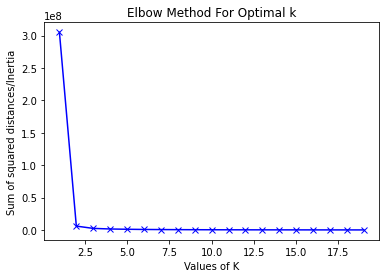

In [15]:
K = range(1,20)
Sum_of_squared_distance = []
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(principalDf)
 Sum_of_squared_distance.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distance,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

             PC1         PC2
1144 -458.090751  -17.663294
1145  579.007288  -24.934610
1146  -78.772311  431.296132
-458.09075124525424 -17.663293957814442
579.0072884008849 -24.934610272456716
-78.77231081311311 431.29613205106426


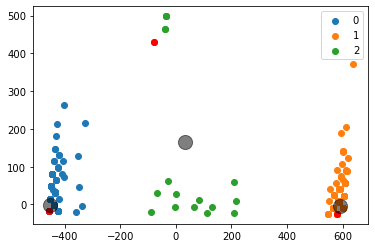

In [20]:
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(principalDf)
#print(label)

#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(principalComponents[label == i , 0] , principalComponents[label == i , 1] , label = i)


df2 = pd.DataFrame(data=principalDf.tail(3))
print(df2)
for i in range(0,len(df2)):
    print(df2.iloc[i]['PC1'], df2.iloc[i]['PC2'])
    plt.scatter(df2.iloc[i]['PC1'], df2.iloc[i]['PC2'], color='red')

    
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

plt.legend()
plt.show()

In [23]:
dataframe_min = principalDf.min()
dataframe_max = principalDf.max()

data_dis_X = math.dist([dataframe_min['PC1']], [dataframe_max['PC1']])
data_dis_Y = math.dist([dataframe_min['PC2']], [dataframe_max['PC2']])

dis_sum = 0
for i in range(0, 3):
    for j in range(0, 3):
        if(label[len(principalDf)-1-j] == i):
            dis_X = math.dist([principalDf.iloc[len(principalDf)-1-j]['PC1']], [kmeans.cluster_centers_[i][0]])
            dis_Y = math.dist([principalDf.iloc[len(principalDf)-1-j]['PC2']], [kmeans.cluster_centers_[i][1]])
            dis_sum += (dis_X/data_dis_X + dis_Y/data_dis_Y)/6

print('Točnost modela je: ', 1-dis_sum)

0.033210599642691956
0.052537360540025856
0.6100610084627072
Točnost modela je:  0.8840318385590958
